In [24]:
# # Cleaning up the directories (only need to run once)
# import os
# import shutil

# def move_subdirectories_up_one_level(src_directory):
#     for subdir in os.listdir(src_directory):
#         current_path = os.path.join(src_directory, subdir)
#         if os.path.isdir(current_path):
#             for item in os.listdir(current_path):
#                 shutil.move(os.path.join(current_path, item), src_directory)
#             os.rmdir(current_path)

# # Directories to fix
# directories = ['plant_cnn/Train', 'plant_cnn/Test', 'plant_cnn/Validation']

# for directory in directories:
#     move_subdirectories_up_one_level(directory)

In [25]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [26]:
# import tensorflow as tf
# from tensorflow.keras.mixed_precision import experimental as mixed_precision

# # Set the mixed precision policy
# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_policy(policy)

In [27]:
import os

def count_files_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

# Directories
directories = ['Train', 'Test', 'Validation']

# Count files in each directory
for directory in directories:
    count = count_files_in_directory(directory)
    print(f'Number of images in {directory}: {count}')

Number of images in Train: 1322
Number of images in Test: 150
Number of images in Validation: 60


In [28]:
import os
from PIL import Image

def collect_image_dimensions(directory):
    dimensions = set()  # Using a set to avoid duplicates
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):  # Add other extensions if needed
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    dimensions.add(img.size)  # img.size returns a tuple (width, height)
    return dimensions

# Directories to search
directories = ['Train', 'Test', 'Validation']

# Collect dimensions
all_dimensions = set()
for directory in directories:
    dimensions = collect_image_dimensions(directory)
    print(f'Dimensions in {directory}: {dimensions}')
    all_dimensions.update(dimensions)

# Print all unique dimensions across all directories
print('\n')
print(f'All unique dimensions: {all_dimensions}') 
# The most common image dimension is 4000x2672

Dimensions in Train: {(4032, 3024), (4000, 2672), (4000, 3000), (5184, 3456), (2592, 1728), (4608, 3456), (2421, 2279)}
Dimensions in Test: {(4000, 2672), (4000, 3000), (5184, 3456), (2592, 1728), (3901, 2607), (4608, 3456)}
Dimensions in Validation: {(4032, 3024), (4000, 2672), (4000, 3000), (5184, 3456), (2592, 1728), (4608, 3456)}


All unique dimensions: {(4032, 3024), (4000, 2672), (4000, 3000), (5184, 3456), (2592, 1728), (3901, 2607), (4608, 3456), (2421, 2279)}


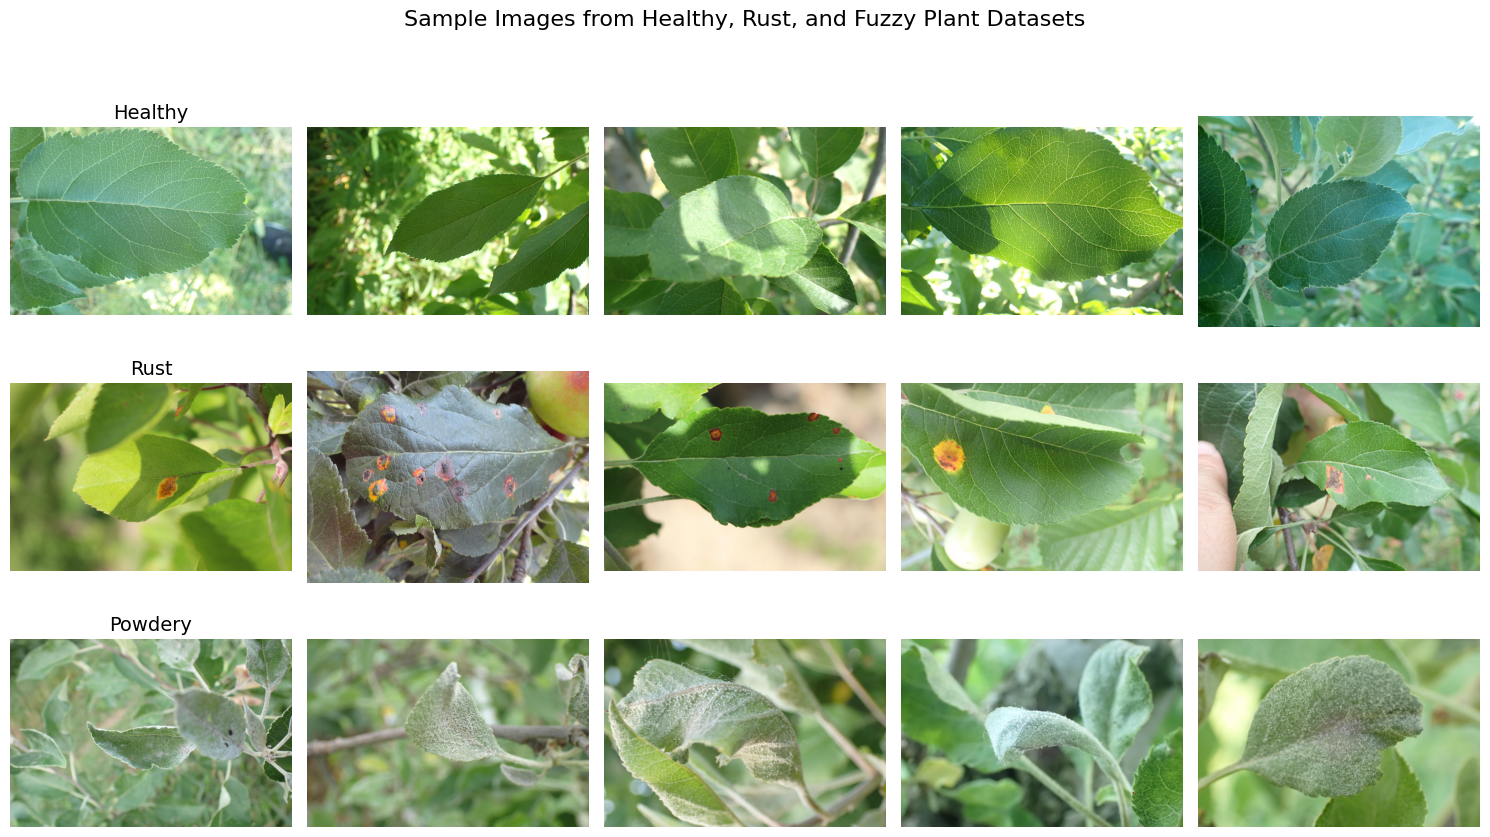

In [29]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def plot_sample_images(directories, categories, num_samples=5):
    fig, axs = plt.subplots(len(categories), num_samples, figsize=(num_samples * 3, len(categories) * 3))
    fig.suptitle('Sample Images from Healthy, Rust, and Fuzzy Plant Datasets', fontsize=16)

    for i, category in enumerate(categories):
        category_path = os.path.join(directories[category])
        sample_files = random.sample(os.listdir(category_path), num_samples)
        
        for j, file in enumerate(sample_files):
            file_path = os.path.join(category_path, file)
            img = Image.open(file_path)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(category, fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Directories for the categories
directories = {
    'Healthy': 'Train/Healthy',
    'Rust': 'Train/Rust',
    'Powdery': 'Train/Powdery'
}

# Categories to plot
categories = ['Healthy', 'Rust', 'Powdery']

# Plot sample images
plot_sample_images(directories, categories)

In [30]:
import tensorflow
import random

seed = random.seed(42)  # Set the random seed to ensure reproducibility


train = tensorflow.keras.utils.image_dataset_from_directory(
    directory='Train', 
    labels='inferred', 
    label_mode='categorical', 
    class_names=['Healthy', 'Powdery', 'Rust'],
    batch_size=16, # number of processed samples before updating the model's weights 
    image_size=(256, 256),
    shuffle=True, 
    seed=seed,
    validation_split=0, # No need to create validation set
    crop_to_aspect_ratio=True # Resize the image without aspect ration distortion 
)

test = tensorflow.keras.utils.image_dataset_from_directory(
    directory='Test', 
    labels='inferred', 
    label_mode='categorical', 
    class_names=['Healthy', 'Powdery', 'Rust'],
    batch_size=16, # number of processed samples before updating the model's weights 
    image_size=(256, 256),
    shuffle=True, 
    seed=seed,
    validation_split=0, # No need to create validation set
    crop_to_aspect_ratio=True # Resize the image without aspect ration distortion 
)

validation = tensorflow.keras.utils.image_dataset_from_directory(
    directory='Validation', 
    labels='inferred', 
    label_mode='categorical', 
    class_names=['Healthy', 'Powdery', 'Rust'],
    batch_size=16, # number of processed samples before updating the model's weights 
    image_size=(256, 256),
    shuffle=True, 
    seed=seed,
    validation_split=0, # No need to create validation set
    crop_to_aspect_ratio=True # Resize the image without aspect ration distortion 
)

Found 1322 files belonging to 3 classes.
Found 150 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


In [31]:
print(f'\nTrain Dataset:{train}')
print(f'\nTest Dataset:{test}')
print(f'\nValidation Dataset:{validation}')
# Images are 256x256 and 3 channels deep, all float32 types 


Train Dataset:<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Test Dataset:<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Validation Dataset:<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


In [32]:
# We need to rescale the images to be btw 0 and 1
from tensorflow.keras.layers import Rescaling
scalar = Rescaling(1./255)
train = train.map(lambda x, y: (scalar(x), y))
test = test.map(lambda x, y: (scalar(x), y))
validation = validation.map(lambda x, y: (scalar(x), y))

In [33]:
import tensorflow as tf

# Set the random seed
seed = 42

# Creating data augmentation pipeline
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = seed),
        
        
        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = seed),
        
        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = seed)
    ]
)

In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

# Adding data augmentation pipeline to the model
model.add(augmentation)

# Feature Learning Layers
# Add the Conv2D layer
model.add(Conv2D(
    filters=32, 
    kernel_size=(3, 3), 
    strides=1, 
    padding='same',  # Ensures same input and output dimensions when strides=1
    input_shape=(256, 256, 3)  # Define the input shape
))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.2))

# Add another Conv2D layer (double the filters and alternate between kernel size)
model.add(Conv2D(
    filters=64, 
    kernel_size=(5, 5), 
    padding='same'  # Ensures same input and output dimensions when strides=1
))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(
    filters=128, 
    kernel_size=(3, 3), 
    padding='same'  # Ensures same input and output dimensions when strides=1
))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(
    filters=256, 
    kernel_size=(5, 5), 
    padding='same'  # Ensures same input and output dimensions when strides=1
))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(
    filters=512, 
    kernel_size=(3, 3), 
    padding='same'  # Ensures same input and output dimensions when strides=1
))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))

# Flattening the input tensors 
model.add(Flatten())

# Fully connected layers
model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer (matching the number of classes we have/classification layer)
model.add(Dense(3, activation='softmax'))


C:\Users\M296984\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compiling the model 
model.compile(optimizer = tf.keras.optimizers.Adam(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric



In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, mode='max', 
                               restore_best_weights=True)

checkpoint=ModelCheckpoint('best_model.keras', 
                           monitor='val_accuracy', 
                           save_best_only=True)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.5253 - loss: 18.5320 - val_accuracy: 0.3333 - val_loss: 23.1315
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5927 - loss: 10.4348 - val_accuracy: 0.4833 - val_loss: 3.6426
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6018 - loss: 8.7189 - val_accuracy: 0.3833 - val_loss: 6.8570
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6360 - loss: 7.5720 - val_accuracy: 0.4833 - val_loss: 4.3727
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7123 - loss: 4.6686 - val_accuracy: 0.6667 - val_loss: 3.3807
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7145 - loss: 4.3533 - val_accuracy: 0.6500 - val_loss: 5.2215
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.7533 - loss: 3.4354 - val_accuracy: 0.8333 - val_loss: 1.6661
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7893 - loss: 2.2698 - val_accuracy: 0.8500 

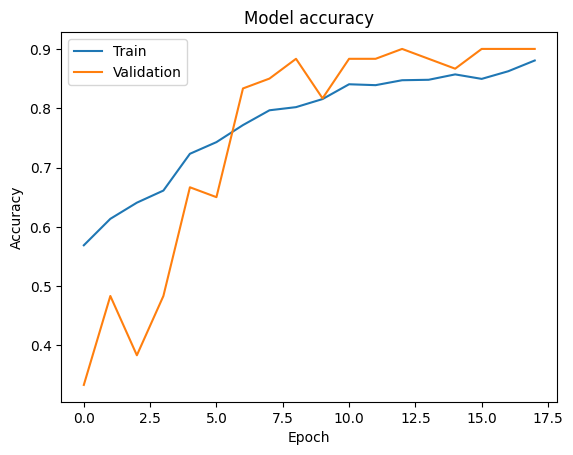

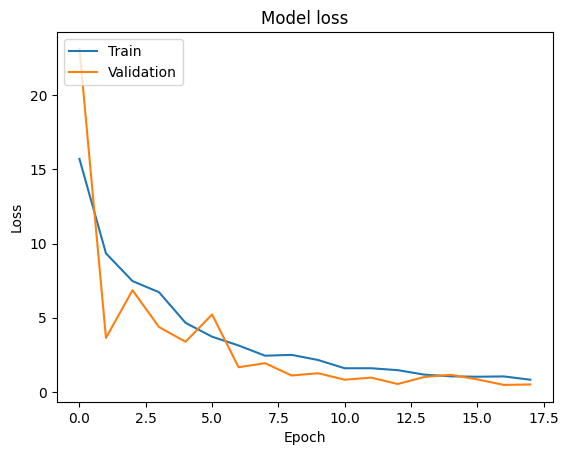

In [51]:
history = model.fit(train, epochs=50, validation_data=validation, callbacks=[early_stopping, checkpoint])


# Print the keys in the history object
print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
model.load_weights('best_model.keras')

In [53]:
preds = model.predict(test)
test_loss, test_acc = model.evaluate(test)

print('\nTesting Loss:', test_loss)
print('\nTesting Accuracy:', test_acc)



10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.9160 - loss: 0.6960

Testing Loss: 0.7894566059112549

Testing Accuracy: 0.8933333158493042


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


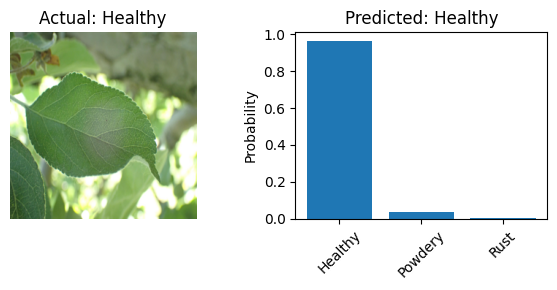

Image 1: Actual label: Healthy, Predicted label: Healthy


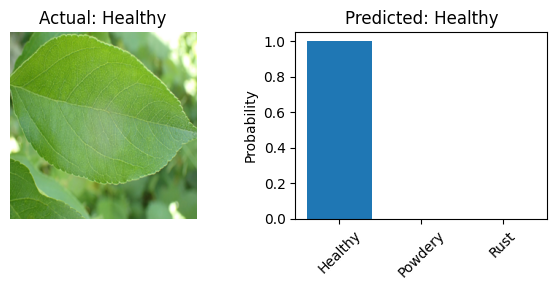

Image 2: Actual label: Healthy, Predicted label: Healthy


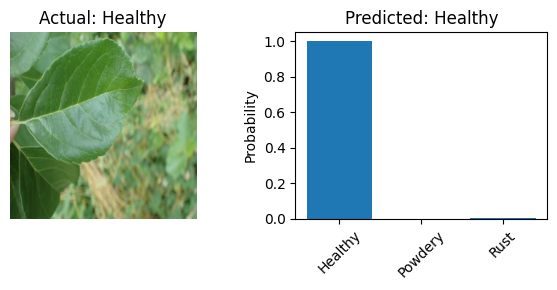

Image 3: Actual label: Healthy, Predicted label: Healthy


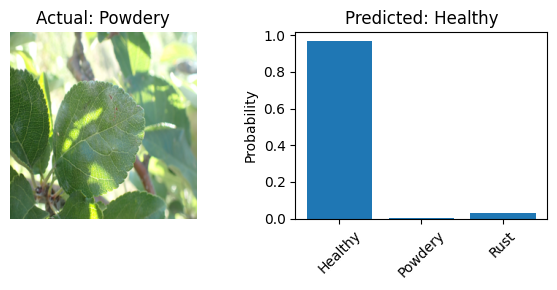

Image 4: Actual label: Powdery, Predicted label: Healthy


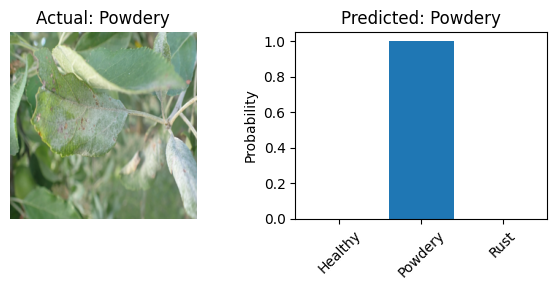

Image 5: Actual label: Powdery, Predicted label: Powdery


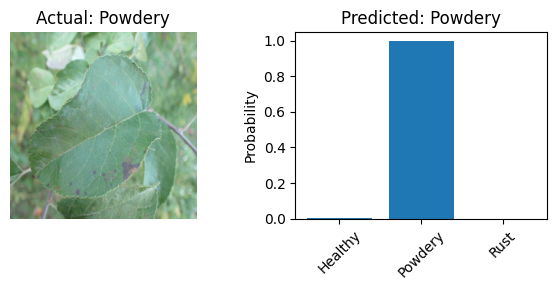

Image 6: Actual label: Powdery, Predicted label: Powdery


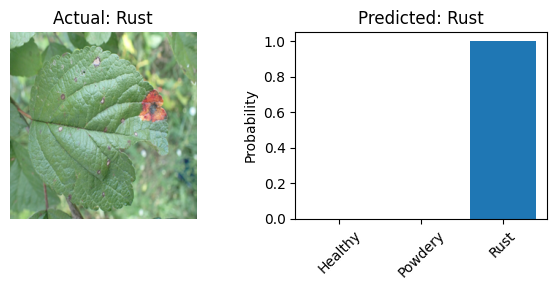

Image 7: Actual label: Rust, Predicted label: Rust


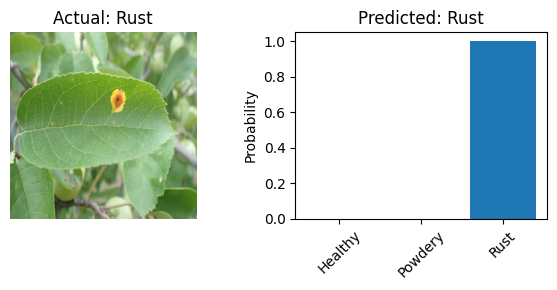

Image 8: Actual label: Rust, Predicted label: Rust


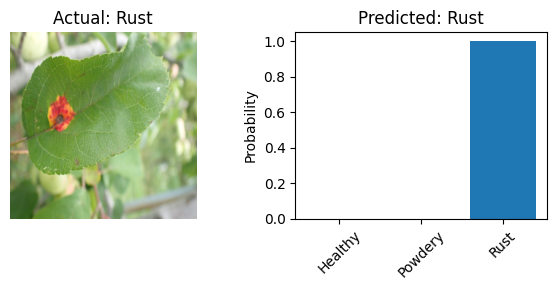

Image 9: Actual label: Rust, Predicted label: Rust


In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# Load the trained model (replace 'best_model.keras' with your actual model filename)
model = tf.keras.models.load_model('best_model.keras')

# Define the class names for your dataset
class_names = ['Healthy', 'Powdery', 'Rust']

# Load and preprocess test data
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = Image.open(img_path).convert('RGB')
            img = img.resize((256, 256))  # Resize to match input shape of the model
            img = np.array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load the test dataset
test_images, test_labels = load_images_from_folder('Test')


# Ensure equal number of samples from each class
def get_equal_samples(images, labels, num_samples=5):
    equal_images = []
    equal_labels = []
    for class_id in range(len(class_names)):
        class_indices = np.where(labels == class_id)[0]
        selected_indices = np.random.choice(class_indices, num_samples, replace=False)
        equal_images.extend(images[selected_indices])
        equal_labels.extend(labels[selected_indices])
    return np.array(equal_images), np.array(equal_labels)

# Get an equal number of images from each class
selected_images, selected_labels = get_equal_samples(test_images, test_labels, num_samples=3)

# Predict the class of the selected test images
predictions = model.predict(selected_images)

# Plot the test images and the model's predictions
num_samples = len(selected_images)
for i in range(num_samples):
    test_image = selected_images[i]
    test_label = selected_labels[i]
    predicted_class = np.argmax(predictions[i])

    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.imshow(test_image)
    plt.title(f"Actual: {class_names[test_label]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(len(class_names)), predictions[i])
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.ylabel('Probability')

    plt.tight_layout()
    plt.show()

    print(f"Image {i + 1}: Actual label: {class_names[test_label]}, Predicted label: {class_names[predicted_class]}")
